# Programación Python para Machine Learning.

## Autor: Victor Simo Lozano

## Actividad 7
<p>Support Vector Machines y Naive Bayes</p>
    

<hr style="border-color:red">

In [1]:
# Generales 
from pandas import read_csv, DataFrame, concat
import numpy as np
import matplotlib.pyplot as plt
import random

# Seleccion de caracteristicas
# from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score

In [2]:
import warnings
warnings.filterwarnings('ignore')

<div style="font-size:14px; text-align:justify"><b>PRIMERA PARTE.-</b><br></div>

Cargar el Dataset "*Climate Model Simulation Crashes*" del repositorio UCI Machine Learning y desarrollar los siguientes puntos:
- Realiza un conteo de las clases y analiza si hay desequilibrio.
- Segmenta el conjunto de datos en entrenamiento y test.
- Realiza el preprocesamiento más adecuando para los datos. No olvides eliminar las dos primeras columnas.
- Entrena un modelo SVM para clasificación y evalúa su rendimiento.
- Trata de buscar la mejor combinación para los distintos parámetros del modelo.


***Fuente:*** *https://archive-beta.ics.uci.edu/ml/datasets/climate+model+simulation+crashes*

In [3]:
# Carga del dataset
# sep='\s+' -> Separador de datos por diferente longitud de espacios en blanco
df=read_csv('pop_failures.dat', sep="\s+", engine='python')

# Representación de los datos
df

,Study,Run,vconst_corr,vconst_2,vconst_3,vconst_4,vconst_5,vconst_7,ah_corr,ah_bolus,...,efficiency_factor,tidal_mix_max,vertical_decay_scale,convect_corr,bckgrnd_vdc1,bckgrnd_vdc_ban,bckgrnd_vdc_eq,bckgrnd_vdc_psim,Prandtl,outcome
0,1,1,0.859036,0.927825,0.252866,0.298838,0.170521,0.735936,0.428325,0.567947,...,0.245675,0.104226,0.869091,0.997518,0.448620,0.307522,0.858310,0.796997,0.869893,0
1,1,2,0.606041,0.457728,0.359448,0.306957,0.843331,0.934851,0.444572,0.828015,...,0.616870,0.975786,0.914344,0.845247,0.864152,0.346713,0.356573,0.438447,0.512256,1
2,1,3,0.997600,0.373238,0.517399,0.504993,0.618903,0.605571,0.746225,0.195928,...,0.679355,0.803413,0.643995,0.718441,0.924775,0.315371,0.250642,0.285636,0.365858,1
3,1,4,0.783408,0.104055,0.197533,0.421837,0.742056,0.490828,0.005525,0.392123,...,0.471463,0.597879,0.761659,0.362751,0.912819,0.977971,0.845921,0.699431,0.475987,1
4,1,5,0.406250,0.513199,0.061812,0.635837,0.844798,0.441502,0.191926,0.487546,...,0.551543,0.743877,0.312349,0.650223,0.522261,0.043545,0.376660,0.280098,0.132283,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,3,176,0.657136,0.489375,0.133713,0.411950,0.087780,0.356289,0.480204,0.029678,...,0.280546,0.384117,0.885948,0.768482,0.459479,0.334482,0.573002,0.610183,0.737706,1
536,3,177,0.915894,0.842720,0.518947,0.090622,0.336981,0.893576,0.978703,0.674868,...,0.798108,0.353546,0.044796,0.990900,0.347027,0.512499,0.810549,0.593332,0.142565,0
537,3,178,0.478600,0.941185,0.769245,0.950776,0.189406,0.112743,0.745645,0.527096,...,0.193103,0.829563,0.101506,0.548878,0.381966,0.198811,0.867108,0.461632,0.652817,1
538,3,179,0.007793,0.779287,0.867468,0.704820,0.983282,0.420303,0.710612,0.174746,...,0.761134,0.436714,0.690132,0.825133,0.981656,0.113193,0.364799,0.201469,0.536535,1


<div style="font-size:14px; text-align:justify"><b>1: </b>Realiza un conteo de las clases y analiza si hay desequilibrio.</div>

Para el análisis de la distribución de los datos, basta con la agrupación de las instancias en base a la característica a la que pertenecen y más adelante valorar el posible desbalanceo o no.

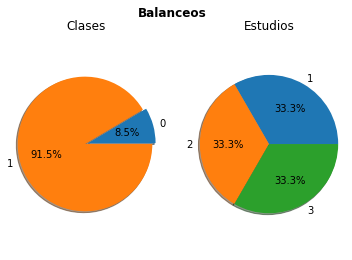

In [4]:
# Agrupación de la columna deseada
outcome_distribution=df.groupby('outcome').size()
study_distribution=df.groupby('Study').size()

# Ploteo de los datos
labels = [df['outcome'].unique(), df['Study'].unique()]
sizes = [outcome_distribution, study_distribution]
explode = (0, 0.05)

fig, axes = plt.subplots(nrows=1, ncols=2)

axes[0].pie(sizes[0], explode=explode, labels=labels[0], autopct='%1.1f%%', shadow=True)
axes[1].pie(sizes[1], labels=labels[1], autopct='%1.1f%%', shadow=True)

axes[0].axis('equal')
axes[1].axis('equal')

axes[0].set_title('Clases')
axes[1].set_title('Estudios')
fig.suptitle('Balanceos', fontweight='bold')

plt.show()

Para el caso de estudio, se trata de un dataset desbalanceado, ya que el 92% de las instancias hacen referencia a la clase "1".<br>
Por otro lado, dado que existe determinadas clases de estudios, se realiza el balanceo de los mismos, y para este caso, observamos que están completamente balanceados ya que existe 3 tipos de estudios y existe 1/3 de instancias para cada tipo de estudio.

<div style="font-size:14px; text-align:justify"><b>2: </b>Segmenta el conjunto de datos en entrenamiento y test.</div>

In [5]:
# Separación en datos de entrada y salida del dataframe
X=df[df.columns[:-1]]
y=df[df.columns[-1:]]

# Separacion train y test
seed = random.randint(0,42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=seed)
display(X_train, y_train)
print(f'''\n Numero de instancias almacenadas para test: {len(X)-len(X_train)}''')

,Study,Run,vconst_corr,vconst_2,vconst_3,vconst_4,vconst_5,vconst_7,ah_corr,ah_bolus,slm_corr,efficiency_factor,tidal_mix_max,vertical_decay_scale,convect_corr,bckgrnd_vdc1,bckgrnd_vdc_ban,bckgrnd_vdc_eq,bckgrnd_vdc_psim,Prandtl
229,2,50,0.146536,0.442065,0.761277,0.471866,0.492871,0.686770,0.087041,0.777557,0.817481,0.813312,0.120348,0.830848,0.905544,0.405013,0.066925,0.476083,0.942685,0.134010
34,1,35,0.014698,0.944566,0.245755,0.680601,0.967000,0.449789,0.593078,0.272489,0.676484,0.756458,0.619869,0.909250,0.702106,0.763603,0.376942,0.477158,0.352573,0.328102
357,2,178,0.115802,0.845830,0.281723,0.931554,0.085654,0.835625,0.304397,0.263684,0.969492,0.699272,0.584713,0.920416,0.720655,0.382025,0.017184,0.720767,0.338794,0.079511
18,1,19,0.453287,0.227814,0.868964,0.839547,0.133349,0.951340,0.179081,0.023152,0.144847,0.674269,0.083273,0.437239,0.231382,0.424553,0.578621,0.140284,0.538909,0.620392
505,3,146,0.595812,0.966107,0.509407,0.662545,0.122212,0.984212,0.491054,0.071069,0.126104,0.302333,0.089746,0.546771,0.278753,0.443169,0.073111,0.032968,0.561098,0.804014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,1,71,0.060471,0.033473,0.274572,0.336015,0.059398,0.875912,0.699808,0.404413,0.860247,0.156562,0.888766,0.210468,0.575220,0.652341,0.210176,0.576552,0.652819,0.191310
277,2,98,0.760379,0.969529,0.046424,0.368554,0.093270,0.919510,0.869802,0.434375,0.565342,0.316268,0.139246,0.481637,0.665316,0.040425,0.689713,0.446805,0.712314,0.127983
9,1,10,0.655626,0.413931,0.805288,0.163486,0.861902,0.947595,0.546564,0.426141,0.417080,0.945610,0.325388,0.666527,0.374270,0.100291,0.213290,0.222860,0.007286,0.420027
359,2,180,0.457451,0.060943,0.437699,0.521741,0.801961,0.442323,0.435728,0.387648,0.908905,0.033245,0.895884,0.213820,0.389119,0.933191,0.215707,0.660153,0.033846,0.355276


,outcome
229,1
34,1
357,1
18,1
505,1
...,...
70,1
277,0
9,1
359,1



 Numero de instancias almacenadas para test: 179


<div style="font-size:14px; text-align:justify"><b>3: </b>Realiza el preprocesamiento más adecuando para los datos. No olvides eliminar las dos primeras columnas.</div>

In [6]:
# Escoger todas las columnas salvo las dos primeras
X_train=X_train[X_train.columns[2:]]
# X_train.plot(kind='box')

In [7]:
# Instancia de SelectKBest con la función ANOVA (f_classif)
# k: Numero de instancias a seleccionar.
filterKB = SelectKBest(score_func=f_classif, k=10)

# Ejecutar la función y obtener los mejores atributos
filter_model = filterKB.fit(X_train, y_train['outcome'])

# Crear X con los parámetros escogidos
# columns=filter_model.get_support(indices=True)
columns_names=filter_model.get_feature_names_out()
data=filter_model.transform(X_train)

X_train=DataFrame(data=data, columns=columns_names)

# Muestra de resultados
print('Resultados obtenidos por atributo:\n', filter_model.scores_, '\n')
print('K atributos seleccionados: \n', columns_names)

Resultados obtenidos por atributo:
 [4.07235765e+01 3.02946949e+01 1.66070371e-01 5.14478750e+00
 1.01840862e+00 4.21007620e-01 6.10329981e-04 1.14328848e-04
 2.89305127e-01 1.20275726e+00 1.50273854e-01 2.22336368e-01
 1.08088820e+01 1.24317948e+01 6.09553264e-01 2.98050241e+00
 2.39825961e+00 2.49531160e+00] 

K atributos seleccionados: 
 ['vconst_corr' 'vconst_2' 'vconst_4' 'vconst_5' 'efficiency_factor'
 'convect_corr' 'bckgrnd_vdc1' 'bckgrnd_vdc_eq' 'bckgrnd_vdc_psim'
 'Prandtl']


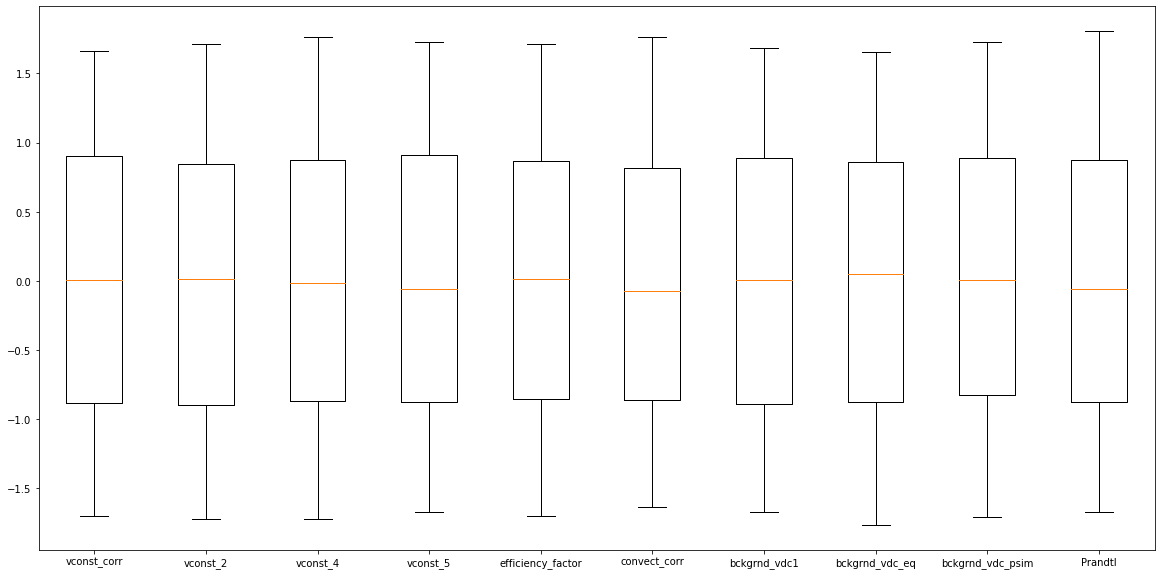

In [8]:
# Normalizado de los datos mediante StandarScaler
stdScaler = StandardScaler().fit(X_train)
data_std=stdScaler.transform(X_train)

X_train=DataFrame(data=data_std, columns=columns_names)

# Ploteo de los resultados
fig, ax = plt.subplots(figsize=[20,10])
# plt.xticks(rotation=90, ha='right')
plt.boxplot(X_train, labels=columns_names)

# X_train.plot(kind='box')

plt.show()

<div style="font-size:14px; text-align:justify"><b>4: </b>Entrena un modelo SVM para clasificación y evalúa su rendimiento.</div>

In [9]:
from sklearn.svm import SVC

modelo = SVC(C=1, class_weight='balanced', kernel='rbf', gamma=0.1)
modelo.fit(X_train, y_train)

# Ajustes a X_test:
# 1- Seleccion de columnas
# 2- stdScaler
X_test=X_test[columns_names]
X_test=stdScaler.transform(X_test)

# Prediccion del modelo
y_pred = modelo.predict(X_test)
 
# Ploteo de resultados
acc= balanced_accuracy_score(y_test, y_pred)
print(f'''Precision balanceada obtenida: {acc:.2f}''')

Precision balanceada obtenida: 0.95


<div style="font-size:14px; text-align:justify"><b>5: </b>Trata de buscar la mejor combinación para los distintos parámetros del modelo.</div>

In [10]:
# Parametros de ajuste
C=np.arange(0.01,25,1)
class_weights=['balanced', None]
kernels=['poly','linear','rbf', 'sigmoid']
gamma=['scale', 'auto', np.arange(2e-13,6e-1,1e-1)]
degrees=range(1,10,1)

def get_svm(C, class_weight, kernel, gamma=None, degree=None):
    '''
    Instancia para SVM según el kernel escogido
    '''
    if kernel=='linear':
        return SVC(C=C, class_weight=class_weight, kernel=kernel)
    elif kernel=='poly':
        return SVC(C=C, class_weight=class_weight, kernel=kernel, gamma=gamma, degree=degree)
    else:
        return SVC(C=C, class_weight=class_weight, kernel=kernel, gamma=gamma)
    
    
def test_model(model):
    # Fit and test
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    
    # Model results
    acc=balanced_accuracy_score(y_test, y_pred)
    err=np.mean(y_pred != y_test.to_numpy())
    
    return [acc, err]


def split_data(X, y):
    # Separacion train y test
    seed = random.randint(0,42)

    X_train, X_test, y_train,  y_test = train_test_split(X, y, test_size=0.33, random_state=seed) 
    
    
    # 1 - Escoger todas las columnas salvo las dos primeras
    X_train=X_train[X_train.columns[2:]]
    
    # 2 -  Instancia de SelectKBest con la función ANOVA (f_classif)
    # k: Numero de instancias a seleccionar.
    filterKB = SelectKBest(score_func=f_classif, k=10)

    # Ejecutar la función y obtener los mejores atributos
    filter_model = filterKB.fit(X_train, y_train['outcome'])

    # Crear X con los parámetros escogidos
    # columns=filter_model.get_support(indices=True)
    columns_names=filter_model.get_feature_names_out()
    data=filter_model.transform(X_train)

    X_train=DataFrame(data=data, columns=columns_names)
    X_test=X_test[columns_names]
    
    # 3  - Normalizado de los datos mediante StandarScaler
    stdScaler = StandardScaler().fit(X_train)
    data_std_train=stdScaler.transform(X_train)
    data_std_test=stdScaler.transform(X_test)

    X_train=DataFrame(data=data_std_train, columns=columns_names)
    X_test=DataFrame(data=data_std_test, columns=columns_names)

    return  X_train, X_test, y_train, y_test
   
     
# Bucle para encontrar la mejor solución
# Orden resultados obtenidos
col_names=['Acc_balanced','Error_mean','Kernel','C',
           'class_weight','gamma','degree']
results=[]

# 1 - Iteracion por Kernels
for kernel in kernels:
    # 2 - Iteracion por class_weights
    for cw_value in class_weights:
        # 3- Iteracion por valores de C
        for c_value in C:
            # print(f'''Kernel: {kernel}''')
            # Separar datos de entrenamiento y test
            X_train, X_test, y_train, y_test = split_data(X, y)
            # Crear modelo por tipo de Kernel
            if kernel=='poly':
                for degree_value in degrees:
                    for gamma_aux in gamma:
                        if gamma_aux not in ['scale', 'auto']:
                            for gamma_value in gamma[2]:
                                model=get_svm(C=c_value, class_weight=cw_value, 
                                              kernel=kernel, gamma=gamma_value, 
                                              degree=degree_value)
                        else:
                            gamma_value=gamma_aux
                            model=get_svm(C=c_value, class_weight=cw_value,
                                          kernel=kernel, gamma=gamma_value, 
                                          degree=degree_value)
                        
                        # Test SVM
                        acc, err = test_model(model)
                        results.append([acc, err, kernel, c_value, cw_value, gamma_value, degree_value])
                        
            elif kernel=='linear':
                degree_value=np.NaN
                gamma_value=np.NaN
                model=get_svm(C=c_value, class_weight=cw_value, kernel=kernel)
                
                # Test SVM
                acc, err = test_model(model)
                results.append([acc, err, kernel, c_value, cw_value, gamma_value, degree_value])
                
            else: # 'rbf', 'sigmoid', 'precomputed'
                degree_value=np.NaN
                for gamma_aux in gamma:
                    if gamma_aux not in ['scale', 'auto']:
                        for gamma_value in gamma[2]:
                            model=get_svm(C=c_value, class_weight=cw_value, kernel=kernel, gamma=gamma_value)
                    else:
                        gamma_value=gamma_aux
                        model=get_svm(C=c_value, class_weight=cw_value, kernel=kernel, gamma=gamma_value)
                        
                    # Test SVM
                    acc, err = test_model(model)
                    results.append([acc, err, kernel, c_value, cw_value, gamma_value, degree_value])                

svm_results=DataFrame(data=results, columns=col_names)
svm_results

,Acc_balanced,Error_mean,Kernel,C,class_weight,gamma,degree
0,0.846699,0.384133,poly,0.01,balanced,scale,1.0
1,0.846699,0.384133,poly,0.01,balanced,auto,1.0
2,0.874928,0.312506,poly,0.01,balanced,0.5,1.0
3,0.500000,0.122905,poly,0.01,balanced,scale,2.0
4,0.500000,0.122905,poly,0.01,balanced,auto,2.0
...,...,...,...,...,...,...,...
1695,0.684756,0.134952,sigmoid,23.01,None,auto,NaN
1696,0.620935,0.176805,sigmoid,23.01,None,0.5,NaN
1697,0.705195,0.120627,sigmoid,24.01,None,scale,NaN
1698,0.705195,0.120627,sigmoid,24.01,None,auto,NaN


In [11]:
error_filter=svm_results.sort_values(by=['Error_mean'], ascending=True)
svm_top_10=error_filter.sort_values(by=['Acc_balanced'], ascending=False).head(10)

svm_top_10

,Acc_balanced,Error_mean,Kernel,C,class_weight,gamma,degree
919,0.958333,0.120252,poly,9.01,None,auto,1.0
918,0.958333,0.120252,poly,9.01,None,scale,1.0
920,0.958333,0.120252,poly,9.01,None,0.5,1.0
1351,0.940120,0.221841,linear,1.01,balanced,NaN,NaN
162,0.939724,0.212634,poly,6.01,balanced,scale,1.0
163,0.939724,0.212634,poly,6.01,balanced,auto,1.0
141,0.933712,0.144752,poly,5.01,balanced,scale,3.0
142,0.933712,0.144752,poly,5.01,balanced,auto,3.0
326,0.928406,0.182454,poly,12.01,balanced,0.5,1.0
324,0.928406,0.182454,poly,12.01,balanced,scale,1.0
